In [ ]:
import tensorflow.keras.layers
import tensorflow.keras.models
import tensorflow.keras.optimizers
import tensorflow.keras.datasets
import numpy
import matplotlib.pyplot
import tensorflow

In [ ]:
import tensorflow

# Define the encoder model
x = tensorflow.keras.layers.Input(shape=(784,), name="encoder_input")
encoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="encoder_dense_layer1")
encoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="encoder_leaky_relu")
encoder_dense_layer2 = tensorflow.keras.layers.Dense(units=2, name="encoder_dense_layer2")
encoder_output = encoder_activ_layer1(x)
encoder_output = encoder_dense_layer2(encoder_output)
encoder_output = tensorflow.keras.layers.LeakyReLU(name="encoder_output")(encoder_output)

encoder = tensorflow.keras.models.Model(x, encoder_output, name="encoder_model")
encoder.summary()


Model: "encoder_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_leaky_relu (LeakyReLU)       │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_dense_layer2 (Dense)         │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_output (LeakyReLU)           │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,570 (6.13 KB)

 Trainable params: 1,570 (6.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# Define the decoder model
decoder_input = tensorflow.keras.layers.Input(shape=(2,), name="decoder_input")
decoder_dense_layer1 = tensorflow.keras.layers.Dense(units=300, name="decoder_dense_layer1")
decoder_activ_layer1 = tensorflow.keras.layers.LeakyReLU(name="decoder_leaky_relu")
decoder_dense_layer2 = tensorflow.keras.layers.Dense(units=784, name="decoder_dense_layer2")
decoder_output = decoder_activ_layer1(decoder_input)
decoder_output = decoder_dense_layer2(decoder_output)

decoder = tensorflow.keras.models.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()



Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_leaky_relu (LeakyReLU)       │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_dense_layer2 (Dense)         │ (None, 784)                 │           2,352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,352 (9.19 KB)

 Trainable params: 2,352 (9.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
ae_input = tensorflow.keras.layers.Input(shape=(784,), name="AE_input")
ae_encoder_output = encoder(ae_input)
ae_decoder_output = decoder(ae_encoder_output)
ae = tensorflow.keras.models.Model(ae_input, ae_decoder_output, name="AE")
ae.summary()


Model: "AE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ AE_input (InputLayer)                │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encoder_model (Functional)           │ (None, 2)                   │           1,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ (None, 784)                 │           2,352 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,922 (15.32 KB)

 Trainable params: 3,922 (15.32 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def rmse(y_true, y_predict):
    return tensorflow.keras.backend.sqrt(tensorflow.keras.backend.mean(tensorflow.keras.backend.square(y_true - y_predict)))


ae.compile(loss="mse", optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.0005))


In [ ]:
import tensorflow
import numpy

# Preparing MNIST Dataset
(x_train_orig, y_train), (x_test_orig, y_test) = tensorflow.keras.datasets.mnist.load_data()

x_train_orig = x_train_orig.astype("float32") / 255.0
x_test_orig = x_test_orig.astype("float32") / 255.0

x_train = numpy.reshape(x_train_orig, newshape=(x_train_orig.shape[0], -1))
x_test = numpy.reshape(x_test_orig, newshape=(x_test_orig.shape[0], -1))



Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0931
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0619
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0583
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0577
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0576
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0576
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0575
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0574
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0574
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0574
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0573
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0572
Epoch 13/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0572
Epoch 14/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0572
Epoch 15/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - l

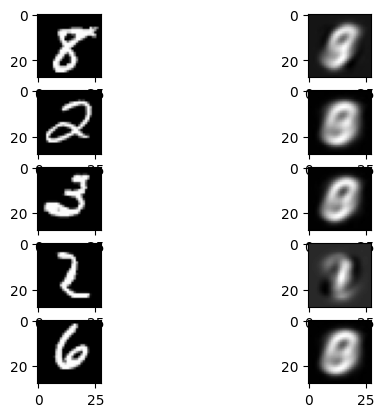

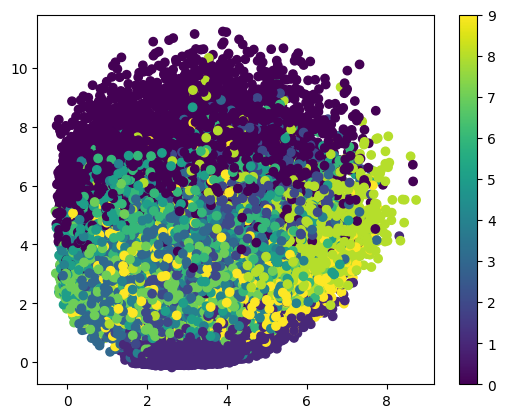

In [ ]:
import numpy
import matplotlib.pyplot as plt  # Import the necessary libraries
# Training AE
ae.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=None)

# Encoding and Decoding
encoded_images = encoder.predict(x_train)
decoded_images = decoder.predict(encoded_images)
decoded_images_orig = numpy.reshape(decoded_images, newshape=(decoded_images.shape[0], 28, 28))

num_images_to_show = 5

for im_ind in range(num_images_to_show):
    plot_ind = im_ind * 2 + 1
    rand_ind = numpy.random.randint(low=0, high=x_train.shape[0])
    plt.subplot(num_images_to_show, 2, plot_ind)
    plt.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    plt.subplot(num_images_to_show, 2, plot_ind + 1)
    plt.imshow(decoded_images_orig[rand_ind, :, :], cmap="gray")

plt.figure()
plt.scatter(encoded_images[:, 0], encoded_images[:, 1], c=y_train)  # Assuming 'y_train' is the correct variable name
plt.colorbar()
plt.show()  # Display the plots

